<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/LassoRegression_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

อ้างอิง : https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression


**การถดถอยแบบ Lasso**
นี่เป็นเทคนิคการทำให้เป็นมาตรฐานที่ใช้ในการเลือกคุณลักษณะโดยใช้วิธีลดขนาดหรือที่เรียกว่า penalized regression คำว่า Lasso ย่อมาจาก Least Absolute Shrinkage and Selection Operator ซึ่งใช้ทั้งสำหรับการทำให้เป็นมาตรฐานและการเลือกแบบจำลอง หากแบบจำลองใช้เทคนิคการทำให้เป็นมาตรฐาน L1 จะเรียกว่าการถดถอยแบบ Lasso

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')

In [6]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Hear

In [5]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler



##Slope

In [19]:
# Preview
features = df[['Age', 'InPatient', 'OutPatient', 'Emergency', 'Sex', 'NATNL',
               'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
               'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB', 'G1M6-MRA',
               'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G2M1-SU',
               'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
               'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat',
               'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
               'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'BMI', 'BSA', 'Diastolic-BP',
               'Systolic-BP', 'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia',
               'D4-SLE', 'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
               'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
               'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
               'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
               'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
               'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
               'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
               'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
               'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
               'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
               'L28-UrineProtein-Cr-ratio']]
target = df['Slopes']

# X and y values
X = features.values
y = target.values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


The dimension of X_train is (36834, 71)
The dimension of X_test is (15786, 71)


In [20]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0003005804506084342


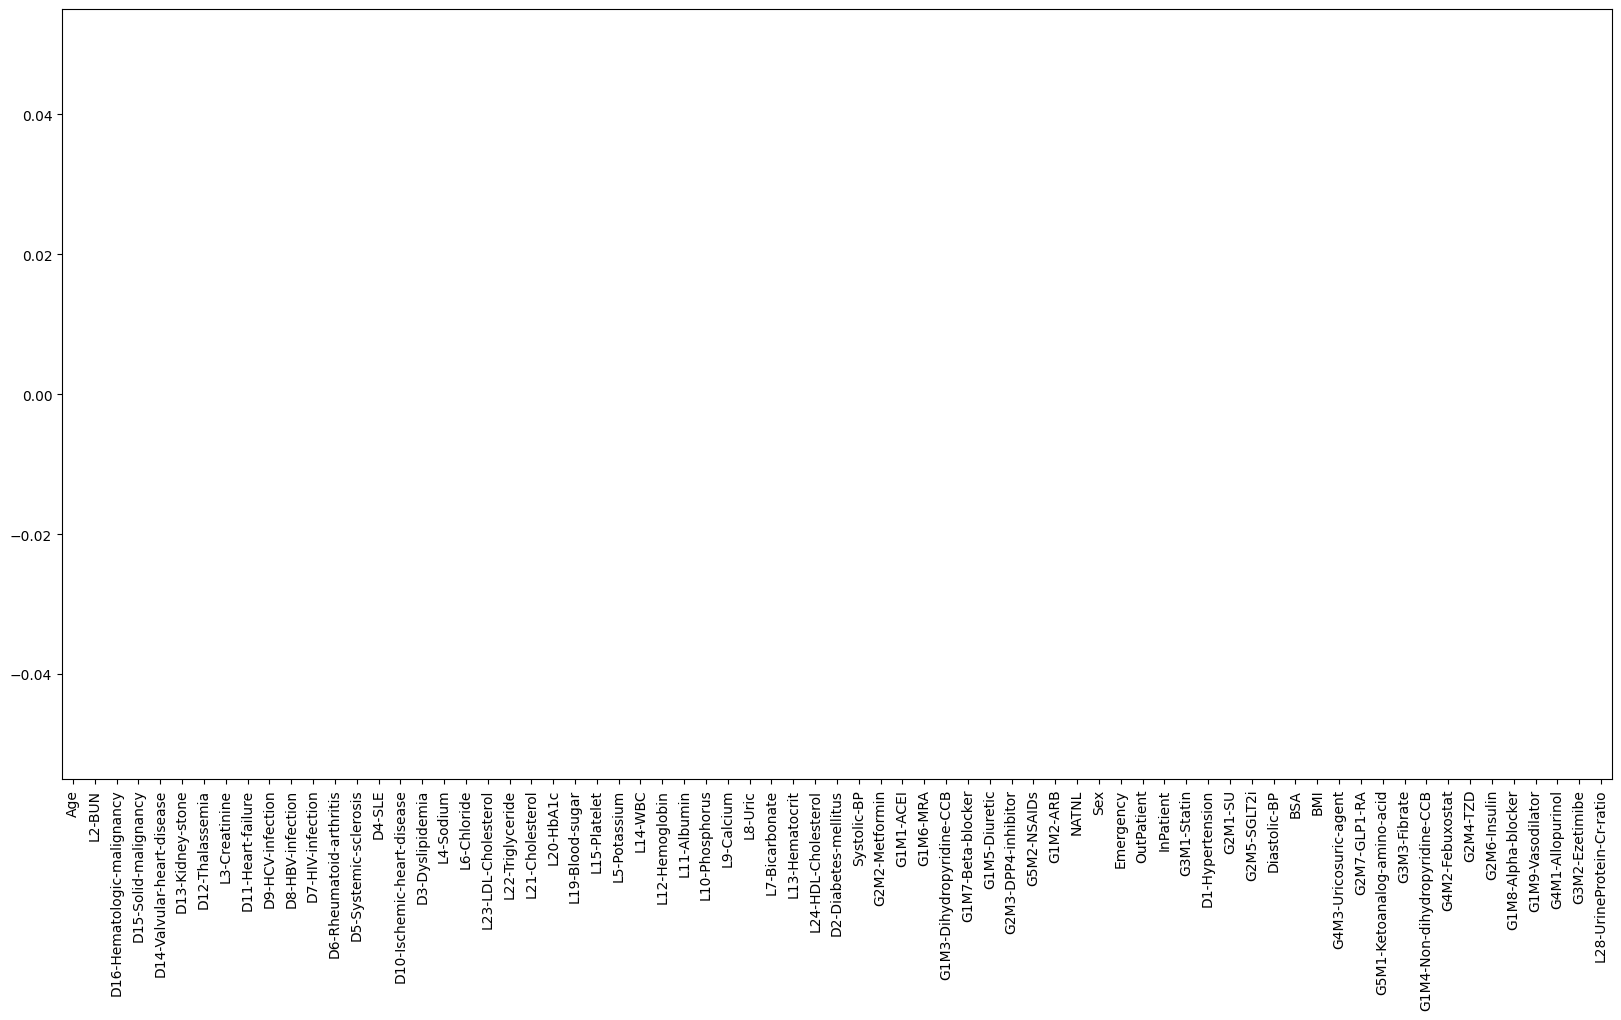

In [25]:
# Extract column names from the DataFrame
feature_names = features.columns

# Create a Pandas Series with Lasso coefficients and feature names
lasso_coefficients = pd.Series(lasso.coef_, index=feature_names)

# Sort the coefficients in ascending order and plot them
lasso_coefficients.sort_values(ascending=True).plot(kind="bar", figsize=(20,10 ))
plt.show()

In [35]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

#score
# Score
print("The train score for Lasso model is {}".format(lasso_cv.score(X_train, y_train)))
print("The test score for Lasso model is {}".format(lasso_cv.score(X_test, y_test)))

The train score for Lasso model is 0.08013230415057848
The test score for Lasso model is -356.2744108354634


##eGFR

In [36]:
# Preview
features = df[['Age', 'InPatient', 'OutPatient', 'Emergency', 'Sex', 'NATNL',
               'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic',
               'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB', 'G1M6-MRA',
               'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor', 'G2M1-SU',
               'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol', 'G1M9-Vasodilator',
               'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat',
               'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
               'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'BMI', 'BSA', 'Diastolic-BP',
               'Systolic-BP', 'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia',
               'D4-SLE', 'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
               'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
               'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
               'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
               'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
               'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
               'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
               'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
               'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
               'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
               'L28-UrineProtein-Cr-ratio']]
target = df['L1-eGFR']

# X and y values
X = features.values
y = target.values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


The dimension of X_train is (36834, 71)
The dimension of X_test is (15786, 71)


In [37]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.06920167367419405
The test score for ls model is -0.7011446651205318


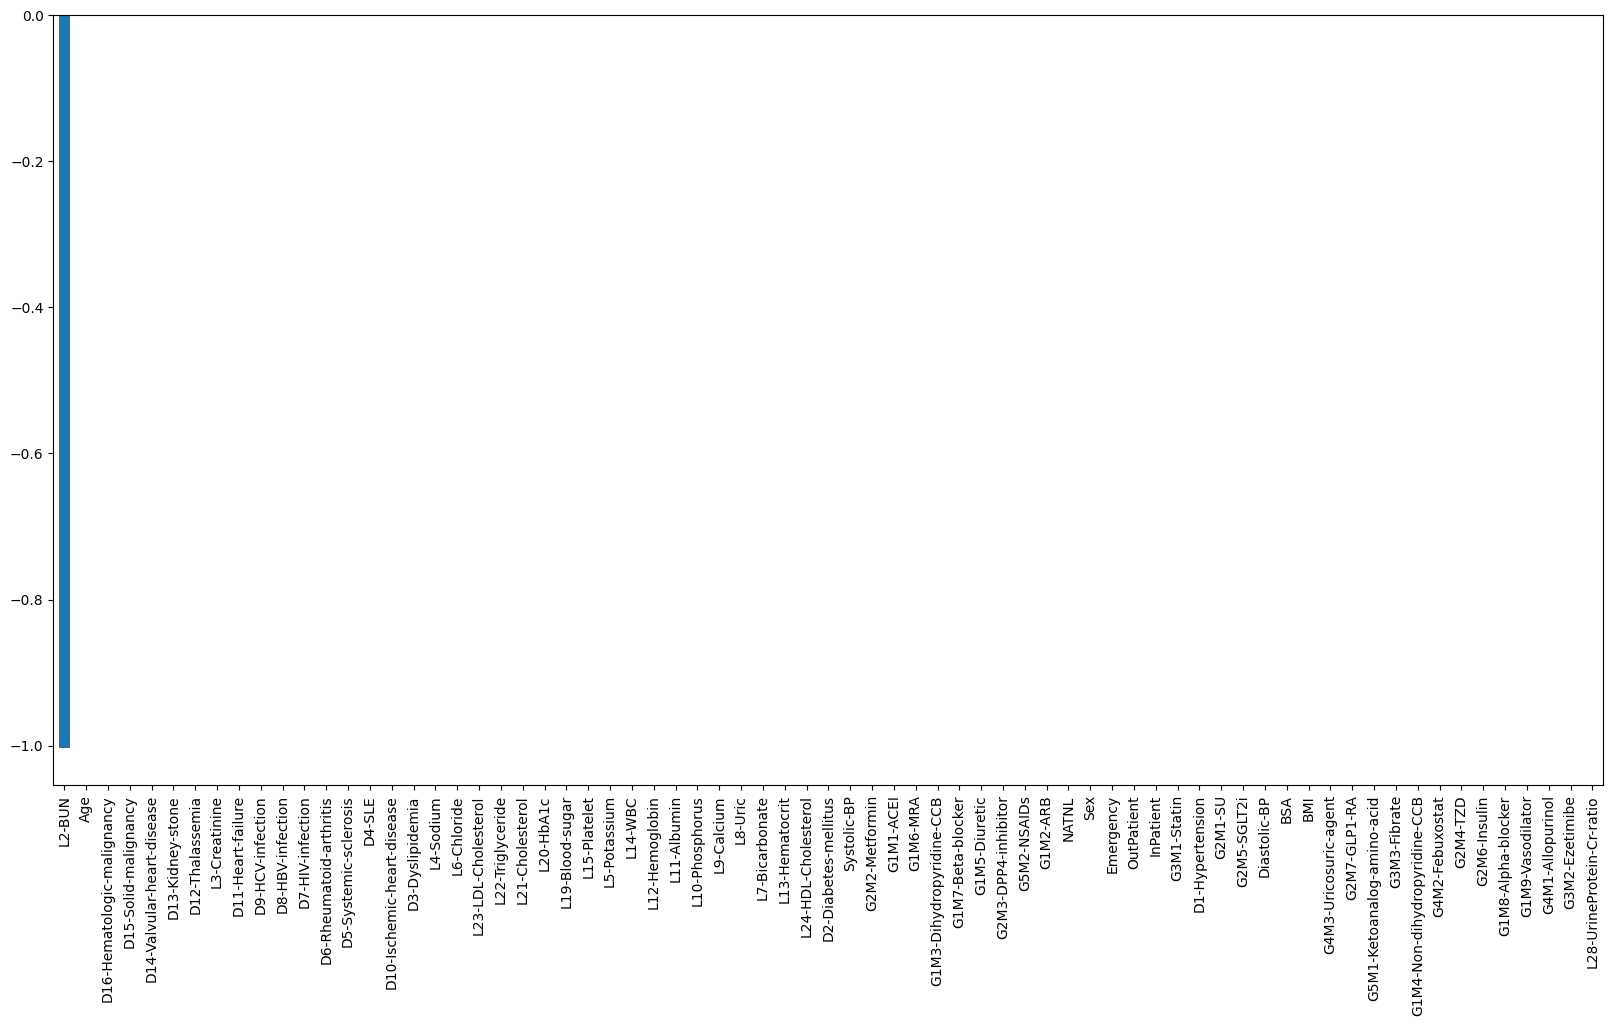

In [39]:
# Extract column names from the DataFrame
feature_names = features.columns

# Create a Pandas Series with Lasso coefficients and feature names
lasso_coefficients = pd.Series(lasso.coef_, index=feature_names)

# Sort the coefficients in ascending order and plot them
lasso_coefficients.sort_values(ascending=True).plot(kind="bar", figsize=(20, 10))
plt.show()

In [40]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

#score
# Score
print("The train score for Lasso model is {}".format(lasso_cv.score(X_train, y_train)))
print("The test score for Lasso model is {}".format(lasso_cv.score(X_test, y_test)))

The train score for Lasso model is 0.64882768262934
The test score for Lasso model is -118.57282020555141
